# **Project Name**    - Hotel Booking Analysis



![Picture](https://drive.google.com/uc?export=view&id=1HBn2NgtJ8uqRnhFFSfmXAxndspcKLTsF)


##### **Project Type**    - EDA


Contribution - Individual (Jayakrishnan)

# **Project Summary -**

This project involves performing an exploratory data analysis (EDA) on a hotel booking dataset containing reservation data from two hotel types across multiple years. The dataset includes a wide range of information such as guest demographics, booking channels, pricing, and cancellations, which allows for a comprehensive investigation into booking behaviors and business trends.

The main objective of this analysis is to uncover meaningful insights that can help improve strategic decision-making in the hospitality sector.

The EDA process begins with cleaning and preprocessing the data to handle missing or inconsistent values. This is followed by data visualization using tools like bar charts, heatmaps, and time-series plots to identify trends, correlations, and outliers.

The findings from this analysis offer valuable business intelligence that can support pricing optimization, marketing strategies, operational planning, and customer retention initiatives.


# **GitHub Link -**

https://github.com/jayakrishnan51200/researchcentre/blob/main/EDA_Hotel_Booking_Trend.ipynb

# **Problem Statement**


Ever tried figuring out the best time to book a hotel or how long to stay to get the best deal? Or maybe you've wondered what makes some guests ask for more special requests than others? This project dives into a hotel booking dataset from a city hotel and a resort hotel to explore exactly that.

The data includes details like when the reservation was made, how long the stay was, the number of guests (adults, kids, and babies), parking availability, and more—without any personal information. The goal is to analyze this information and uncover patterns that affect bookings, rates, and guest behavior, which can help hotels make smarter business decisions.

#### **Define Your Business Objective?**

Business objective is to understand and visualize dataset from hotel and customer point of view.

1) Reasons for booking cancellations

2)Best time to book hotel

3)Peak season

4) suggestions to reduce cancellations

5) increase revenue of hotels.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Imporing all the necessary libraries
import numpy as np # Numerical operations on arrays and matrices
import pandas as pd #  Data manipulation and analysis
import matplotlib.pyplot as plt #  Data visualization (basic plots).
import seaborn as sns # Statistical data visualization (built on top of Matplotlib).
%matplotlib inline
import plotly.express as px # To create a variety of interactive visualizations
! pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.0 MB/s eta 0:00:00


###To view all columns

In [ ]:
pd.set_option('display.max_columns', None) # it will display all the columns by default its none

In [ ]:
plt.style.use('ggplot') # setting ploting style to ggplot

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
hotel_bookings_df = pd.read_csv('/content/drive/MyDrive/hotel_booking.csv')

### Dataset First View

In [ ]:
# first 5 rows of the dataset
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
#last 5 rows of the dataset
hotel_bookings_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


### Dataset Rows & Columns count

In [ ]:
#Dataset rows and coloumns count
print(f'total number of rows in the dataset are {hotel_bookings_df.shape[0]}')
print(f'total number of columns in the dataset are {hotel_bookings_df.shape[1]}')

total number of rows in the dataset are 119390
total number of columns in the dataset are 36


### Dataset Information

On the basis of info, it is there are some missing values and different data types can be seen

In [ ]:
# Dataset Info
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Total number of duplicate value : {hotel_bookings_df.duplicated().sum()}')

Total number of duplicate value : 0


####**Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
null_counts=hotel_bookings_df.isna().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
print(null_counts)

company     112593
agent        16340
country        488
children         4
dtype: int64


####We will eliminate the "company" column from our further analysis as it has a large number of Null values that will negatively affect our ability to analyze the data further.


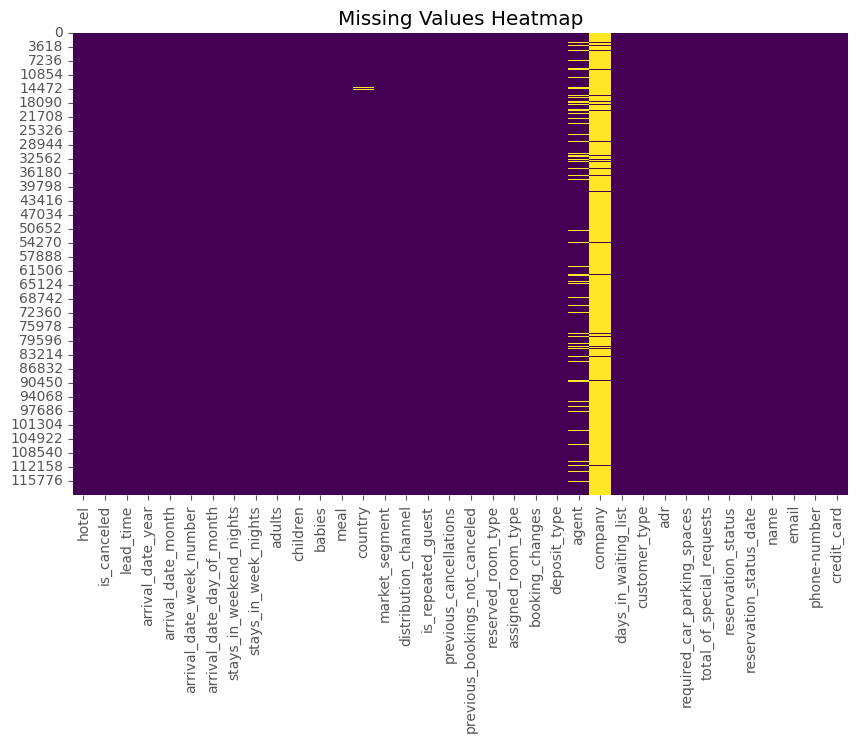

In [ ]:
# Visualizing the missing values

#create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hotel_bookings_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.It includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. The dataset contains a total of 119390 rows and 36 columns.Also it have null values in company , agent , country column. Company has extremely large number of null values as compared to other columns.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(hotel_bookings_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [ ]:
# Dataset Describe
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

# **Understanding Data Types in Hotel Booking Dataset**

## **Categorical Variables (Ordinal):**
1. **hotel:**
   - Name of the hotel (Resort Hotel or City Hotel).
  
2. **is_canceled:**
   - If the booking was canceled (1) or not (0).

3. **lead_time:**
   - Number of days before the actual arrival of the guest.

4. **arrival_date_year:**
   - Year of arrival date.  

5. **arrival_date_month:**
   - Month of month arrival date.
  

6. **arrival_date_week_number:**
   - Week number of year for arrival date.

7. **arrival_date_day_of_month:**
   - Day of arrival date.

8. **stay_in_weekend_nights:**
   - Number of weekend nights (Saturday or sunday) spent at the hotel by the guest.

9. **stay_in_week_nights:**
   - Number of week nights (Monday to Friday) spent at the hotel by the guest.

10. **adults:**
    - Number of adults among guests.

11. **children:**
    - Number of children among  guests.  

1. **babies:**
   - Number of babies among guests.

2. **meal:**
   - Type of meal booked.

3. **country:**
    - Country of guests.

4. **market_segment:**
  - Designation of market segment.

5. **distribution_channel:**
   - Name of booking distribution channel.

6. **is_repeated_guest:**
   - If the booking was from a repeated guest (1) or (0).

7. **previous_cancellation:**
   - Number of previous bookings that were cancelled by the customer prior to the current booking.

8. **previous_booking_not_canceled:**
   - Number of previous bookings not cancelled by the customer prior to the current booking.

9. **reserved_room_type:**
   - Code of room type assigned.

10. **assigned_room_type:**
    - Code of room type assigned.

11. **booking_changes:**
    - Number of changes/amendments made to the  booking.

12. **deposit_type:**
    - Type of the deposit made by the guest.

13. **agent**:
    - ID of the company that made the booking.

14. **company:**
    - ID of the company that made the booking.

15. **days_in_waiting_list:**
    - Number of days  the booking was in the waiting list.

16. **customer_type:**
    - Type of cusrtomer, assuming one of four categories.

17. **adr:**
    - Average Daily Rate,as defined by dividing the sum of all lodging transaction by the total number of staying nights.

18. **required_car_parking_spaces:**
    - Number of car parking spaces required by the customer

30. **total_of_special_requests:**
    - Numbers of special requests made by the customer

31. **reservation_status:**
    - Reservation status (canceled,check-out or No-show)

32. **reservation_status_date:**
    - Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(hotel_bookings_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

Dropping duplicates

In [ ]:
# Dropping the duplicate values
hotel_bookings_df.drop_duplicates(inplace = True)

In [ ]:
# after removing duplicate , count of total rows
print(f'After removing duplicates , number of rows are :  {hotel_bookings_df.shape[0]}')

After removing duplicates , number of rows are :  119390


Replacing null values

In [ ]:
# droping the company coloumn as it  has highest null values
hotel_bookings_df.drop(['company'], axis=1, inplace=True)

# replacing null values in children column with 0  as there are only 4 missing values ,assuming that family had 0 children
# replacing null values in agent column with 0 assuming those rooms were booked without company/agent
hotel_bookings_df[['children','agent']] = hotel_bookings_df[['children','agent']].fillna(0)


In [ ]:
# replacing null values in country column as 'Others' assuming that user didnt found their country name
hotel_bookings_df['country'].fillna('Others', inplace = True)

In [ ]:
# checking that now there are no null values
hotel_bookings_df.isna().sum().sort_values(ascending=False)

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# There are some rows with total number of adults, children or babies equal to zero
# this means there is no any booking were made.
# So we can remove such rows

In [ ]:
hotel_bookings_df.drop(hotel_bookings_df[hotel_bookings_df['adults']+hotel_bookings_df['babies']+hotel_bookings_df['children'] == 0].index, inplace = True)

In [ ]:
# number of rows having with 0 in adult babies and children coloumn
zero_entry=hotel_bookings_df[hotel_bookings_df['adults']+hotel_bookings_df['babies']+hotel_bookings_df['children'] == 0].shape[0]
print(f"There are {zero_entry} rows which has zero value")

There are 0 rows which has zero value


## changing data type

In [ ]:
#showing the info of the data to check datatype
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [ ]:
# We have seen that childern & agent column as datatype as float whereas it contains only int value,so change datatype as int64
hotel_bookings_df[['children', 'agent']] = hotel_bookings_df[['children', 'agent']].astype('int64')

In [ ]:
# for our understanding, in column 'is_canceled' we will replace the value from (0,1) to not_canceled, is canceled.
hotel_bookings_df['is_canceled'] = hotel_bookings_df['is_canceled'].replace([0,1], ['not canceled', 'is canceled'])


In [ ]:
#Same for 'is_repeated_guest' column
hotel_bookings_df['is_repeated_guest'] = hotel_bookings_df['is_repeated_guest'].replace([0,1], ['not repeated', 'repeated'])

## addition of new coloumns

In [ ]:
#total stay in nights
# We have created a col for total stays in nights by adding week night & weekend nights stay col.
hotel_bookings_df['total_stay_in_nights'] = hotel_bookings_df ['stays_in_week_nights'] + hotel_bookings_df ['stays_in_weekend_nights']

In [ ]:
# We have created a col for revenue using total stay * adr
hotel_bookings_df['revenue'] = hotel_bookings_df['total_stay_in_nights'] *hotel_bookings_df['adr']


In [ ]:
# Also, for information, we will add a column with total number of guests coming for each booking
hotel_bookings_df['total_guest'] = hotel_bookings_df['adults'] + hotel_bookings_df['children'] + hotel_bookings_df['babies']

### What all manipulations have you done and insights you found?

**1**)Dropping duplicates :


**2**)Handling Null Values: 'children', 'country', 'agent', and 'company'.
These are the column with null values and droping the company coloumn as it  has highest null values


*   Then replacing null values in agent column with 0 assuming those rooms were booked without company/agent

*   Then I have filled  null values in children column with 0  as there are only 4 missing values ,assuming that family had 0 children.
*   Replacing null values in the country column with 'others'to avoid confusion.




**3**) There are some rows with total number of adults, children or babies equal to zero , this means there is no any booking were made . So we have removed 166 rows having with 0 in adult ,babies and children coloumn

**4**)Childern & agent column  datatype was float but it contains only int value,so change datatype as int64.

**5**)for our understanding, in column 'is_canceled' we will replace the value from (0,1) to not_canceled, is canceled and same done for 'is_repeated_guest' column

**6)**There are few columns required in Data to analysis purpose which is created from the given columns.

Total Guests: This columns will help us to evaluate the volumes of total guest and revenue as well. We get this value by adding total no. of Adults, Children & babies.

Revenue : We find revenue by multiplying adr & total guest. This column will use to analyse the profit and growth of each hotel.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **UNIVARIATE ANALYSIS**

Which type of hotel preffered by the guests resort or city ?

In [ ]:
# count occurence of each hotel type in hotel column
hotel_counts = hotel_bookings_df['hotel'].value_counts()

<Figure size 600x700 with 0 Axes>

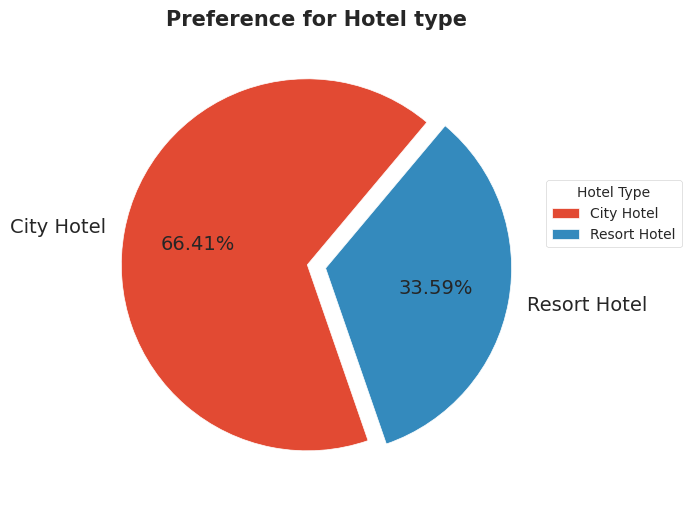

In [ ]:
# visualize the data
#plot a pie chart
plt.figure(figsize=(6, 7))
# visualize the data
#plot a pie chart
plt.figure(figsize=(6, 7))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.2f%%', startangle=50, explode=[0.05, 0.05], textprops={'fontsize': 14})
plt.title('Preference for Hotel type', fontsize=15, fontweight='bold')
plt.legend(title='Hotel Type',bbox_to_anchor=(1.3, 0.7))
plt.show()

#####1. Why did you pick the specific chart?

Pie chart helps in comparision of data and also it shows the fractional part of whole?

#####2. What is/are the insight(s) found from the chart?

We can clearly see from visualization that city hotel has higher number of bookings ie. 66.41% and resort hotel has 33.59% bookings only

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Gained sights helped in creating positive business impact as in city hotel it can provide more services to increase their revenue. In resort hotel it can improve thier services to attract more customers.

###Chart-2

In [ ]:
# count occurences of repeated and non repeated in is_repeated_col
guest_repeat = hotel_bookings_df['is_repeated_guest'].value_counts()

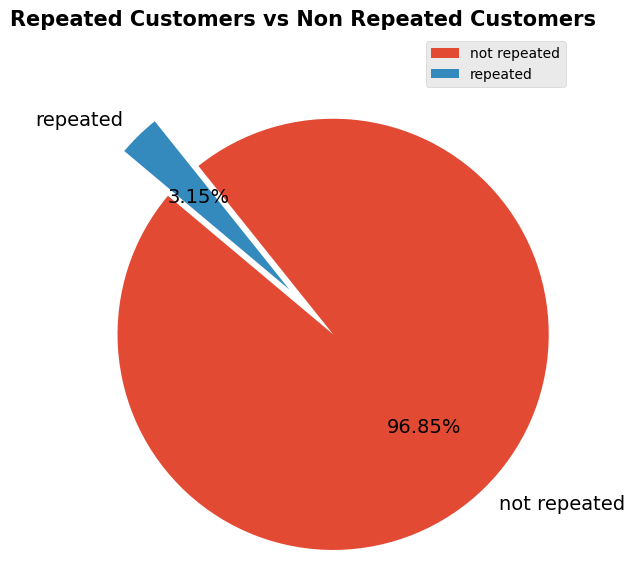

In [ ]:
# visualize the data
# Plotting a pie chart
plt.figure(figsize = (7,7))
plt.pie(guest_repeat, labels=guest_repeat.index, autopct='%1.2f%%', startangle=140, explode=[0.2, 0.09], textprops={'fontsize': 14})
plt.title('Repeated Customers vs Non Repeated Customers', fontsize=15, fontweight='bold')
plt.legend()
# display the pie chart
plt.show()


How many guests repeated ?

#####1. Why did you pick the specific chart?

To show the percentage share of repeated & non-repeated guests pie chart helps for comparision

#####2. What is/are the insight(s) found from the chart?

The number of repeated guests is very less as compared to overall guests, its only 3.15%

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Taking feedback from guests so that hotel can imporve their services. Giving seasonal discounts and offers,can attract non repeating customers to visit hotel again that will have postive impact on business

##Chart - 3

What is the percentage of cancellation?

In [ ]:
# count of canceled and non-canceled bookings
cancel_count = hotel_bookings_df['is_canceled'].value_counts()


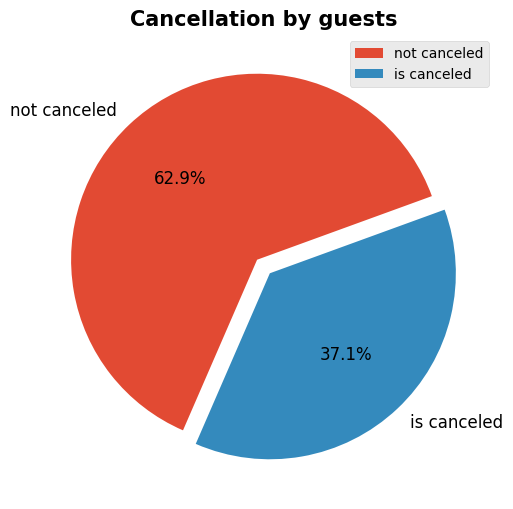

In [ ]:
# visualize the data
# Plotting a pie chart
plt.figure(figsize = (6,7))
plt.pie(cancel_count, labels=cancel_count.index, autopct='%1.1f%%', startangle=20, explode=[0.05, 0.05], textprops={'fontsize': 12})
plt.title('Cancellation by guests', fontsize=15, fontweight='bold')
plt.legend()
# display the pie chart
plt.show()

#####1. Why did you pick the specific chart?

This chart presentes the cancellation rate of the hotels booking.

2. What is/are the insight(s) found from the chart?

Guests who cancelled are around 37% and those who not cancelled are 63%

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Around 63% guests didnt cancel their booking so, its a positve impact on hotel. Cancellation rate is 37% , from business persecptive cancellation rate is quite high. We need to findout the reason of cancellation by taking feedback from guest.

##Chart - 4

Which type of food is mostly preferred by the guests?

In [ ]:
# count occurences each meal type
meal_count=hotel_bookings_df['meal'].value_counts()
meal_count


,count
meal,
BB,92236
HB,14458
SC,10549
Undefined,1169
FB,798


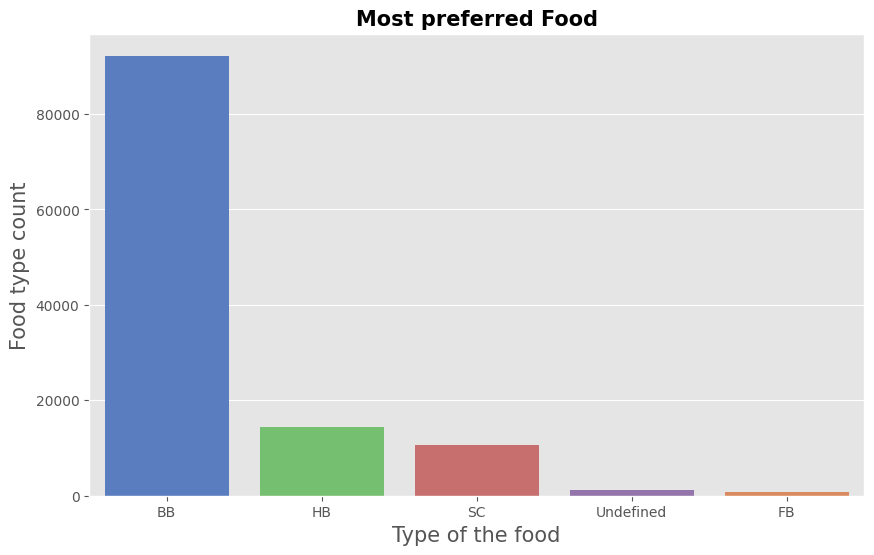

In [ ]:
 # .visualize the data
plt.figure(figsize=(10,6))
sns.countplot(x='meal', data=hotel_bookings_df, order=meal_count.index, hue='meal', palette="muted", legend=False)
plt.title("Most preferred Food",fontsize=15, fontweight='bold')
plt.xlabel('Type of the food', fontsize = 15)
plt.ylabel('Food type count', fontsize = 15)
plt.show()

#####Types of meals in hotel:

BB - (Bed and Breakfast), FB - (Full Board), SC - (Self Catering)

#####1. Why did you pick the specific chart?

I have choose barchart to visualize most preferred food because it displays the count of each observation for each category and here we have to find which food is most preferred

#####2. What is/are the insight(s) found from the chart?

Bed and Breakfast is the most preferred food by 92236 guests

Self Catering is the preferred food by 10549 guests and Half Board is 14458 guests

Full Board is least preferred only 798 guest ordered it

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

BB type of food is most preferred food this makes positive impact on business. Undefined and FB type of food is less preferred this insight makes neative impact on business.

##Chart - 5

What is most preferred room type by guests?

In [ ]:
# count of room type booked by guest
room_count=hotel_bookings_df['assigned_room_type'].value_counts()
room_count


,count
assigned_room_type,
A,74020
D,25309
E,7798
F,3751
G,2549
C,2370
B,2154
H,712
I,359


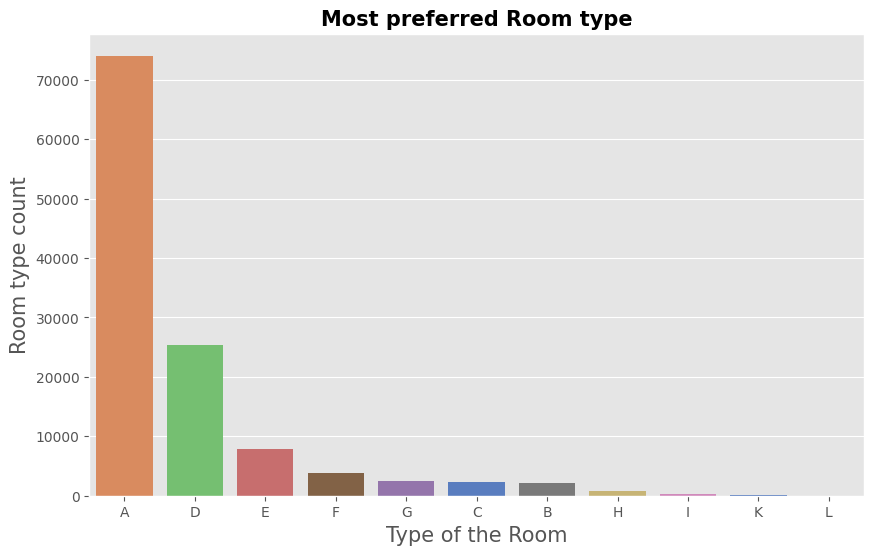

In [ ]:
# visualise the data
plt.figure(figsize=(10,6))

sns.countplot(x='assigned_room_type', data=hotel_bookings_df, order=room_count.index, hue='assigned_room_type', palette='muted', legend=False)

plt.title("Most preferred Room type", fontsize=15, fontweight='bold')
plt.xlabel('Type of the Room', fontsize=15)
plt.ylabel('Room type count', fontsize=15)

plt.show()

#####1. Why did you pick the specific chart?

I have choose countplot to visualize most prefferd roomtype because countplot display the count of each observation for each category and here we have to represent room type vs room type count.

#####2. What is/are the insight(s) found from the chart?

The insighte found from the chart is A type rooms are most prefered rooms and the count is 74020 and after that D type rooms are prefered by the guest and count is 25309.

Least preffered room is K and L. K type room is preffered by only 187 and only 1 guest has booked L type room.

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

A type rooms are most preferred rooms. This make positive impact on business. H,I,K,L type rooms are less preferred this insight makes negative impact. This is beacause type A rooms have 74020 bookings and type L room has only one booking.

##Chart - 6

Which agent made the most bookings?

In [ ]:
# count top 10 agent with most bookings
top_agent=hotel_bookings_df['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
# rename column name for better understanding
top_agent


,num_of_bookings,count
0,9,31922
1,0,16280
2,240,13922
3,1,7187
4,14,3633
5,7,3532
6,6,3290
7,250,2870
8,241,1721
9,28,1657


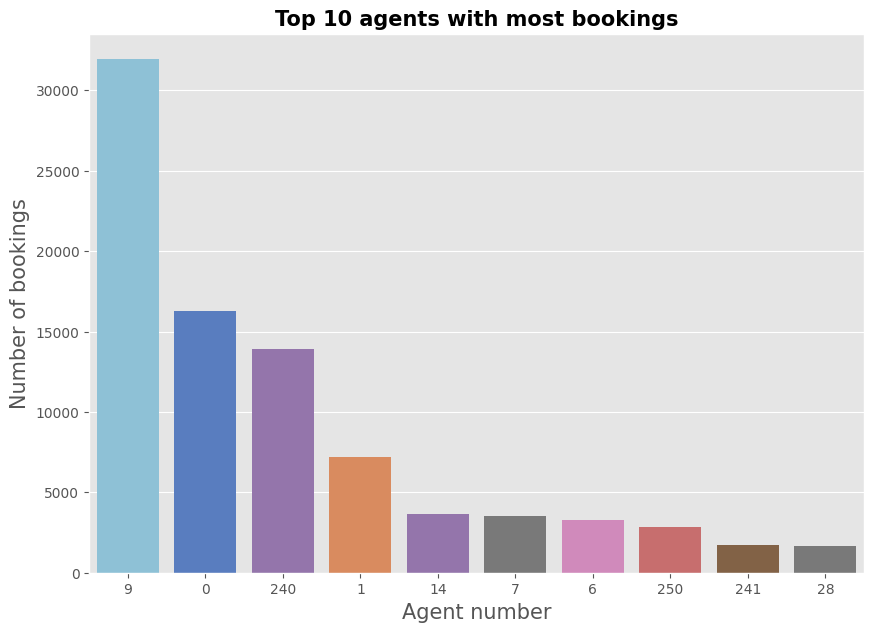

In [ ]:
# visualize the data

plt.figure(figsize=(10,7))
sns.countplot(x='agent', data=hotel_bookings_df, order=hotel_bookings_df['agent'].value_counts().index[:10], hue='agent', palette='muted', legend=False)

plt.title('Top 10 agents with most bookings', fontsize=15, fontweight='bold')
plt.ylabel('Number of bookings', fontsize=15)
plt.xlabel('Agent number', fontsize=15)

plt.show()


#####1. Why did you pick the specific chart?

I choose barplot here because it gives data visualization in pictorial form and due to this comparison of data is easy.

#####2. What is/are the insight(s) found from the chart?

The insight found here is Agent no. 9 made most of the bookings.

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, Agent no.9,0, 240 has more bookins which makes positive impact.

 - Agent no. 241 and 28  has less bookins which makes neative impact.

### **Chart - 7**

From which country most of the guests are coming?

In [ ]:

# Count occurrences of top 10 country in the country column
top_ten_country=hotel_bookings_df['country'].value_counts().reset_index()[:10]
top_ten_country


,country,count
0,PRT,48483
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
5,ITA,3761
6,IRL,3374
7,BEL,2342
8,BRA,2222
9,NLD,2103


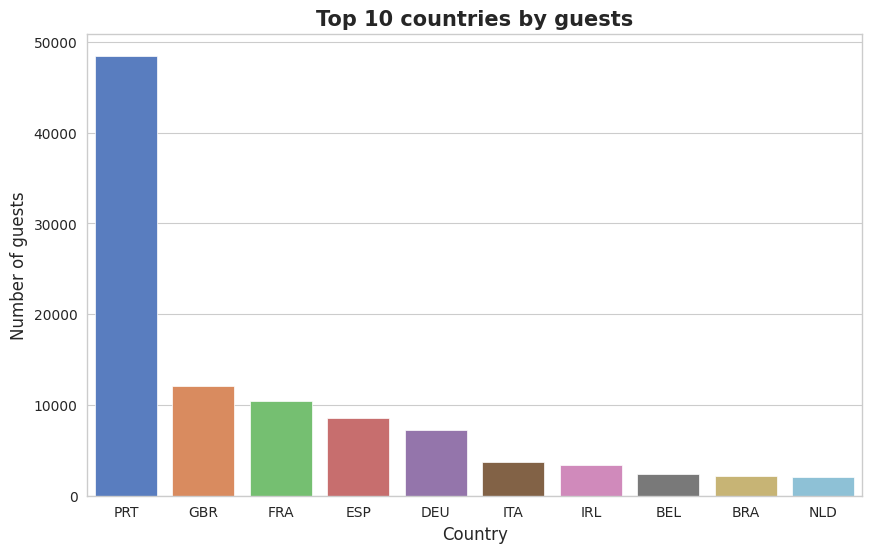

In [ ]:
# Visualizing by  plotting the graph

plt.figure(figsize=(10,6))

sns.barplot(x='country', y='count', data=top_ten_country, palette='muted', hue='country', dodge=False)
plt.legend([],[], frameon=False)  # Disable the legend

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of guests', fontsize=12)
plt.title("Top 10 countries by guests", fontsize=15, fontweight='bold')

plt.show()

#####1. Why did you pick the specific chart?

Bar plots are effective for comparing numerical values, such as the number of guests in this case

#####2. What is/are the insight(s) found from the chart?

Most of the guests are coming from portugal i.e 48483 guests are from portugal

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

This data can be used for attracting the remaining people of Portugal and other neighbouring contries, some schemes may be introduced or social media awareness, advertising may be increased to get more customers from nearby areas.

Feedback gathered from these guests may be used to increase guests from other countries too and strategies may be planned according to this.

abbrevations for countries-

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

##Chart - 8

Which distribution channel is mostly used for hotel booking?

In [ ]:
# count of occurences of each distribution channel
distribution_channel = hotel_bookings_df['distribution_channel'].value_counts()
distribution_channel


,count
distribution_channel,
TA/TO,97750
Direct,14611
Corporate,6651
GDS,193
Undefined,5


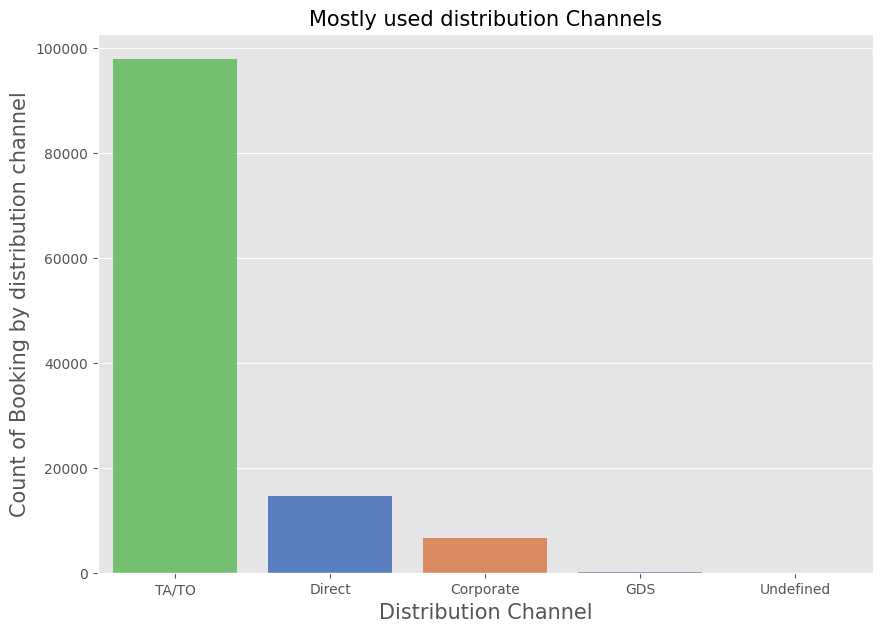

In [ ]:
#Visualization
plt.figure(figsize=(10,7))

sns.countplot(x='distribution_channel', data=hotel_bookings_df, order=distribution_channel.index, hue='distribution_channel', palette='muted', legend=False)

plt.title("Mostly used distribution Channels", fontsize=15)
plt.xlabel('Distribution Channel', fontsize=15)
plt.ylabel('Count of Booking by distribution channel', fontsize=15)
plt.show()

#####1. Why did you pick the specific chart?

The following chart represent maximum volume of booking done through which channel to represnt the numbers in descending order

#####2. What is/are the insight(s) found from the chart?

Mostly used distribution channel is TA/TO channel.The total count of booking is 97750

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

 - Distribution channel TA/TO is mostly used channel this makes positive impact.

 - Distribution channel GDS and undefined is less used channels this makes negative impact.

 - ther channels can provide those facilities which are provided by TA/TO channel.

##BIVARIATE ANALYSIS and MULTIVARIATE ANALYSIS

##Chart -9

Which year has highest number of bookings?

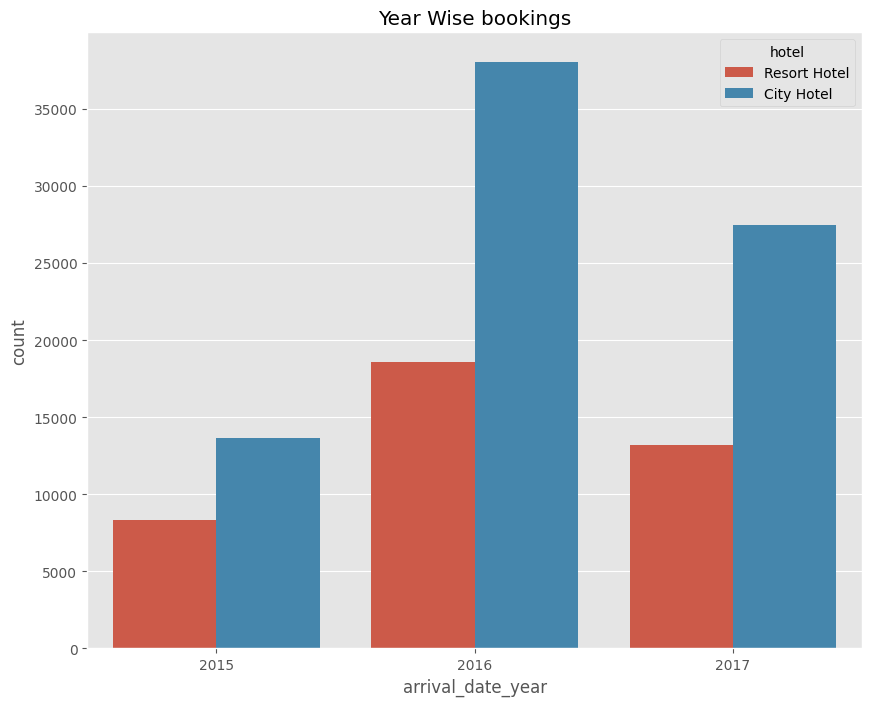

In [ ]:
# set plot size
plt.figure(figsize=(10,8))
# plot with countplot
sns.countplot(x=hotel_bookings_df['arrival_date_year'],hue=hotel_bookings_df['hotel'])
plt.title("Year Wise bookings")
plt.show()

#####1. Why did you pick the specific chart?

Because countplot is easy to understand.

#####2. What is/are the insight(s) found from the chart?

2016 had highest bookings and 2015 had lowest bookings.

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

For Resort hotel in year 2015 it was with least number of bookings and in 2016 it increased but in 2017 it again decreased , it means they have to find out the reasons for this using feedback of guest. For City hotel in year 2015 it was the lowest and in 2016 it was on peak and again it decreased in booking in 2017.

##Chart - 10

What is ADR accross different months?

In [ ]:
#  Using groupby funtion
bookings_by_months_df = hotel_bookings_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the dataframe along with values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting values
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

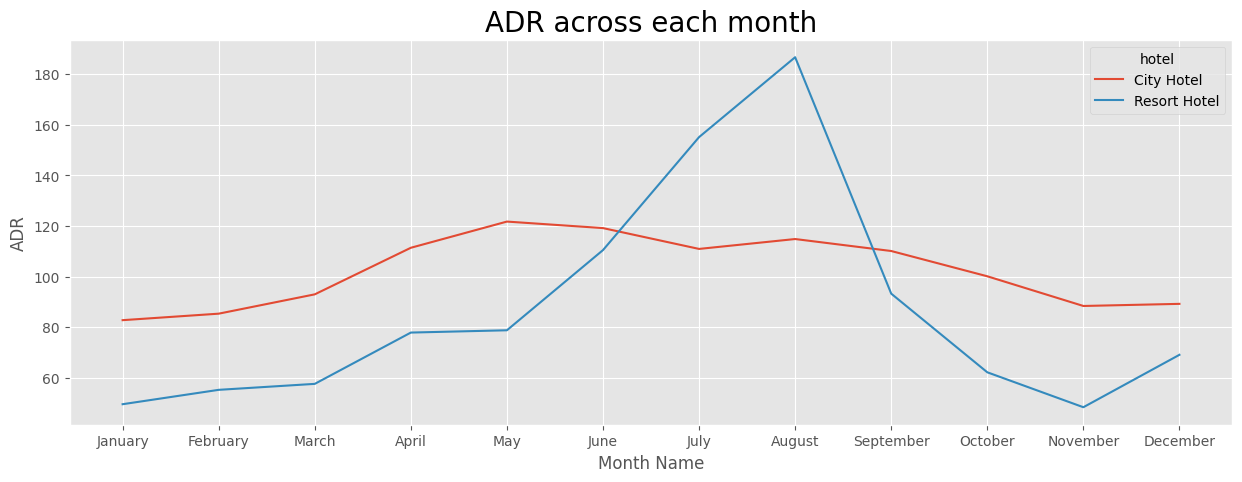

In [ ]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# Show chart
plt.show()

#####1. Why did you pick the specific chart?

I have used line plot in this case because it effectively shows the trend of ADR over time

#####2. What is/are the insight(s) found from the chart?

City Hotel : It is clear that City Hotel generates more revenue in May months in comparison to other months.

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

With the knowledge that City Hotel generates more revenue in May and Resort Hotel generates more revenue between July and August, hotels can focus marketing , promotions, and special offer to attract more guests during these peak months.

##Chart - 11

Which month has the most bookings in each hotel type?

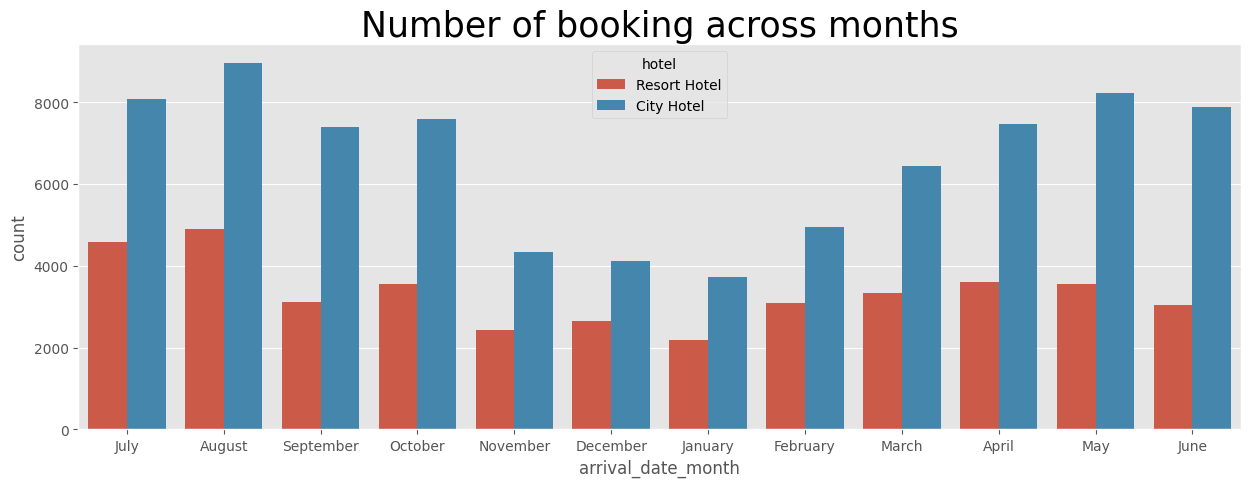

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=hotel_bookings_df['arrival_date_month'],hue=hotel_bookings_df['hotel'])
plt.title("Number of booking across months", fontsize = 25)
plt.show()

#####1. Why did you pick the specific chart?

Count plots are used when you want to compare the counts of different categories. In this case, it allows us to visually compare the number of bookings made for each month by hotel type

#####2. What is/are the insight(s) found from the chart?

The highest number of bookings appear to be in July and August. Lowest booking months: December, January and November appear to be the months with the fewest bookings.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

There is negative insight but hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

##Chart - 12

Which distribution channel has highest adr?

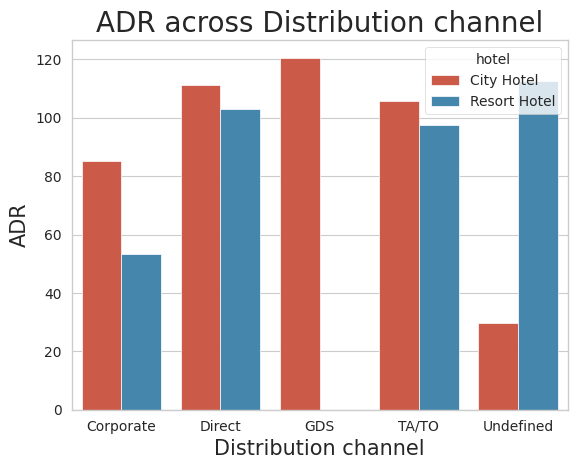

In [ ]:
# Grouping dist_channel and hotels on their adr
distribution_channel = hotel_bookings_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# Visualization by using barplot
sns.barplot(x='distribution_channel',y='adr',data=distribution_channel,hue='hotel')
plt.title('ADR across Distribution channel', fontsize=20)
plt.xlabel('Distribution channel',fontsize=15)
plt.ylabel('ADR', fontsize=15)
dist_channel_adr = hotel_bookings_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()


#####1. Why did you pick the specific chart?

I use here barplot to visualise ADR across distribution channel beacuse it give easy to undertand visualization to large data.

#####2. What is/are the insight(s) found from the chart?


The insight find from the above chart is that GDS channel contributed most in ADR in city hotel and Direct and TA/TO has nearly equal contribution in adr in both hotel types.



#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

 - GDS distribution channel contributed more to adr for city hotel

 -  Undefined distribution channel contributed more to adr for resort hotel this makes positive impact.

 - GDS distribution channel has no any contribution to adr for resort hotel and undefined distribution channel contributed less to adr for city hotel this makes neative impact.

##Chart - 13

How does lead time vary accross different hotel types?

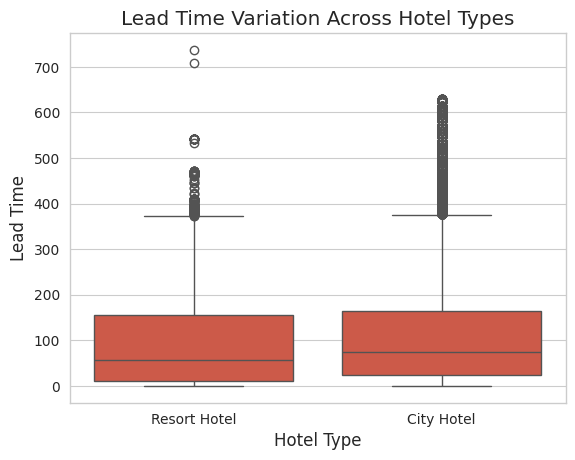

In [ ]:

sns.boxplot(data=hotel_bookings_df, x='hotel', y='lead_time')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.title('Lead Time Variation Across Hotel Types')
plt.show()


######1. Why did you pick the specific chart?

The boxplot chart illustrates the variation in lead time (the duration between booking and arrival) across different hotel types.

#####2. What is/are the insight(s) found from the chart?

By understanding the average lead time for different hotel types, the business can communicate realistic expectations to guests, especially regarding the time required for booking confirmation and preparation before arrival.

#####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the average lead time for different hotel types, the business can communicate realistic expectations to guests, especially regarding the time required for booking confirmation and preparation before arrival.

##Chart - 14 - Pair Plot

<Figure size 1000x800 with 0 Axes>

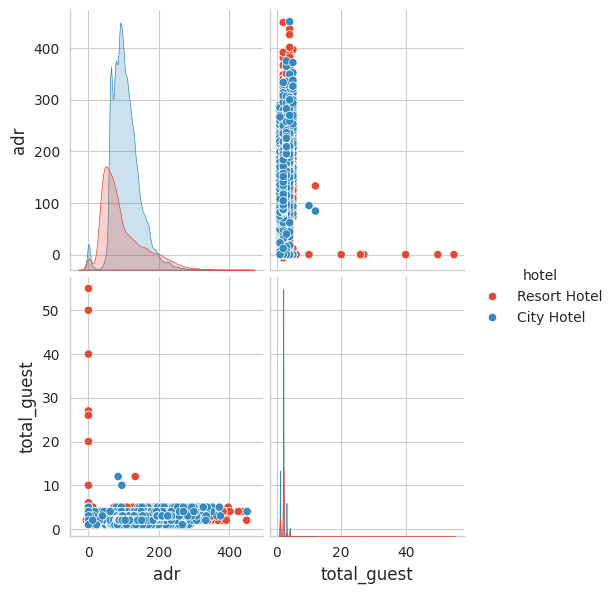

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.pairplot(data = hotel_bookings_df[hotel_bookings_df['adr']<500][['hotel','adr', 'total_guest']],height = 3,aspect = 0.8, hue ='hotel')
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables .It is also a great method to identify trends for follow-up analysis.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that For City hotel ADR is maximum if we compare with resort hotel, and ADR is also increases as number of people is less (<=5). If number of of people will increase they tends to book Resort Hotel.

###Chart - 15 - Correlation Heatmap

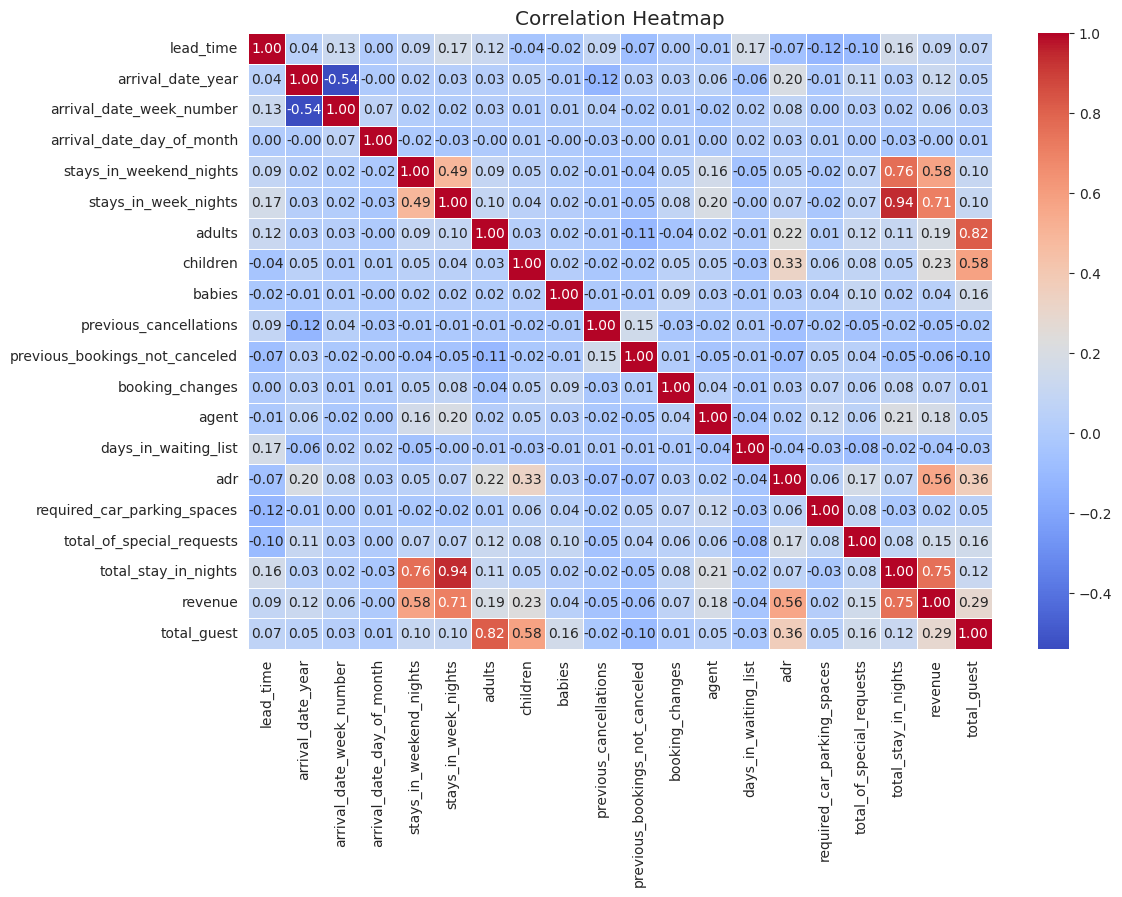

In [ ]:
numeric_columns = hotel_bookings_df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = hotel_bookings_df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#####1. Why did you pick the specific chart?

chose a heatmap to visualize the correlation matrix because it is an effective way to represent the relationships between multiple numeric variables in a dataset. Heatmaps provide a clear, intuitive visual representation of how variables correlate with each other, with color gradients indicating the strength and direction (positive or negative) of these correlations.

#####2. What is/are the insight(s) found from the chart?

Total Stay in Nights is a central variable, highly correlated with both stays in week nights and weekend nights, and strongly influencing revenue. Revenue is significantly influenced by ADR, total stay in nights, and total guests. Variables like lead time and previous cancellations show little to no correlation with most other variables, indicating their limited impact on other factors.

##5. Solution to Business Objective

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

####Reasons for Booking Cancellations:
To understand why guests cancel their bookings, hotels should look into reasons like last-minute changes in plans, finding better deals, or simply not being satisfied with certain aspects of the booking. By asking guests directly through surveys, hotels can get valuable insights into these reasons. With this feedback, hotels can make adjustments to improve the guest experience, reduce cancellations, and increase the chances that guests will stick to their original bookings.

###Best Time to Book Hotel:
By analyzing when most people tend to book their stays and how far in advance they do it, hotels can predict the best times to offer deals. Understanding these patterns allows them to adjust prices to attract more guests. They can also offer special discounts or deals during quieter periods to encourage guests to book when the hotel usually has fewer reservations.

###Peak Season:
Knowing when the peak season hits helps hotels plan better. They can ensure there’s enough staff and rooms to accommodate the higher demand. Also, by recognizing these busy periods, hotels can step up their marketing efforts to make the most out of the increased traffic and revenue potential.

###Suggestions to Reduce Cancellations:
To reduce cancellations, hotels can offer guests more flexibility with their bookings. Allowing them to change or cancel their reservations without extra charges can help keep guests happy and reduce the likelihood that they’ll cancel. Communicating clearly with guests before and after the booking also sets expectations and makes them feel more comfortable, leading to fewer cancellations.

###Increase Revenue of Hotels:
Hotels can boost their revenue by adjusting room prices based on demand and competitor pricing. Offering upgrades or special packages can also be an effective way to increase revenue per guest. Collaborating with local businesses for exclusive offers adds extra value and attracts more guests, ultimately helping the hotel make more money.



# **Conclusion**

###These are some conclusions that we get after performing EDA

- City Hotel is the Preferred Choice: The City Hotel is the most popular choice among guests, suggesting it has a stronger appeal compared to the resort hotel.

- Low Repeat Guests: Only about 3.19% of guests are repeat customers, indicating that guest loyalty could be an area for improvement.

- High Cancellation Rate: The cancellation rate is notably high at 37%, which could indicate that there are challenges in retaining guests or managing booking expectations.

- BB Meal Type is the Most Popular: Guests overwhelmingly prefer the BB (Bed & Breakfast) option, which could inform the hotel's food offerings or marketing strategies.

- Room Type A is Most Popular: Room Type A is the most requested, highlighting a clear preference from guests, which could guide inventory management and marketing efforts.

- Agent No. 9 Dominates Bookings: Agent number 9 has made the most bookings, suggesting that this agent may have a strong influence or loyal customer base, which could be worth leveraging for further bookings.

- Guests Primarily Come from Portugal: A significant portion of guests come from Portugal, which could provide valuable insight for targeted marketing campaigns or partnerships in that region.

- TA/TO Distribution Channel is Most Common: The TA/TO (Travel Agent/Tour Operator) distribution channel is the most frequently used by guests, signaling the importance of maintaining strong relationships with these partners.

- 2016 Had the Highest Bookings: The year 2016 saw the highest number of bookings for both the City and Resort hotels, indicating it was a particularly strong year for both properties.

- Revenue Peaks in May for City Hotel: The City Hotel generates more revenue in May, suggesting that this month could be key for targeting guests and adjusting pricing strategies.

- Resort Hotel’s Peak Season is in Summer: The Resort Hotel performs best between July and August, aligning with typical peak vacation times for resorts.

- GDS Channel is Key for City Hotel’s ADR: The GDS (Global Distribution System) channel contributes the most to the Average Daily Rate (ADR) for the City Hotel, indicating that this channel is vital for generating higher revenue per room.

- Direct & TA/TO Channels Contribute Equally to ADR in Both Hotels: Both the Direct and TA/TO channels play a nearly equal role in contributing to the ADR for both hotel types, suggesting that a balanced distribution strategy could optimize revenue.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***